In [61]:
import pandas as pd
import numpy as np
import glob
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models, regularizers
import matplotlib.pyplot as plt

# Specify the path to the directory containing CSV files
directory_path = '/home/ramya/ROB537/final_project/csv/all/'

# Use glob to get a list of CSV files in the directory
csv_files = glob.glob(directory_path + '*.csv')

In [35]:
# Initialize lists to store numpy arrays and corresponding labels
data_arrays = []
labels = []

# Loop through each CSV file
for csv_file in csv_files:
    # Extract the label from the CSV file title
    label = csv_file.split('/')[-1].split('.')[0].split('_')[0]  # Adjust this based on your file path structure
    if label == "good":
        label = 1
    else: # label == "bad"
        label = 0

    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_file)

    # Assuming your CSV represents 2D data (e.g., image pixels)
    data_array = df.to_numpy()

    # Append the data array and corresponding label
    data_arrays.append(data_array)
    labels.append(label)

# Convert the lists to numpy arrays
all_data = np.stack(data_arrays)
all_labels = np.array(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(all_data, all_labels, test_size=0.2, random_state=42)

In [64]:
# one dimensional CNN
cnn_model = models.Sequential()
cnn_model.add(layers.Conv1D(32, 3, activation='relu', input_shape=(1000, 26)))
cnn_model.add(layers.MaxPooling1D(2))
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(64, activation='relu'))
cnn_model.add(layers.Dense(1, activation='sigmoid'))

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_history = cnn_model.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_test, y_test))

Epoch 1/100
43/43 [==============================] - 2s 26ms/step - loss: 50.9748 - accuracy: 0.5870 - val_loss: 42.3676 - val_accuracy: 0.6471
Epoch 2/100
43/43 [==============================] - 1s 23ms/step - loss: 11.4219 - accuracy: 0.6785 - val_loss: 1.5419 - val_accuracy: 0.6824
Epoch 3/100
43/43 [==============================] - 1s 24ms/step - loss: 0.5756 - accuracy: 0.6755 - val_loss: 1.5210 - val_accuracy: 0.6706
Epoch 4/100
43/43 [==============================] - 1s 23ms/step - loss: 0.5432 - accuracy: 0.7198 - val_loss: 1.7789 - val_accuracy: 0.6824
Epoch 5/100
43/43 [==============================] - 1s 23ms/step - loss: 0.5232 - accuracy: 0.7168 - val_loss: 2.6950 - val_accuracy: 0.7176
Epoch 6/100
43/43 [==============================] - 1s 21ms/step - loss: 0.4992 - accuracy: 0.7227 - val_loss: 3.0705 - val_accuracy: 0.7176
Epoch 7/100
43/43 [==============================] - 1s 22ms/step - loss: 0.5110 - accuracy: 0.7404 - val_loss: 0.5072 - val_accuracy: 0.7647
Epo

In [65]:
# RNN
rnn_model = models.Sequential()
rnn_model.add(layers.SimpleRNN(32, activation='relu', input_shape=(1000, 26)))
rnn_model.add(layers.Dense(64, activation='relu'))
rnn_model.add(layers.Dense(1, activation='sigmoid'))

rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
rnn_history = rnn_model.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_test, y_test))

Epoch 1/100
43/43 [==============================] - 10s 189ms/step - loss: 9.9747 - accuracy: 0.4956 - val_loss: 0.6597 - val_accuracy: 0.7294
Epoch 2/100
43/43 [==============================] - 7s 170ms/step - loss: 0.6997 - accuracy: 0.6578 - val_loss: 0.5154 - val_accuracy: 0.7882
Epoch 3/100
43/43 [==============================] - 7s 173ms/step - loss: 0.4662 - accuracy: 0.7965 - val_loss: 0.4751 - val_accuracy: 0.7882
Epoch 4/100
43/43 [==============================] - 8s 178ms/step - loss: 0.4270 - accuracy: 0.8407 - val_loss: 0.4414 - val_accuracy: 0.8353
Epoch 5/100
43/43 [==============================] - 8s 176ms/step - loss: 0.4084 - accuracy: 0.8407 - val_loss: 0.4430 - val_accuracy: 0.8000
Epoch 6/100
43/43 [==============================] - 8s 176ms/step - loss: 0.3823 - accuracy: 0.8348 - val_loss: 0.5286 - val_accuracy: 0.7765
Epoch 7/100
43/43 [==============================] - 7s 175ms/step - loss: 0.3731 - accuracy: 0.8702 - val_loss: 0.4337 - val_accuracy: 0.800

In [62]:
# Define the LSTM model
lstm_model = models.Sequential()
lstm_model.add(layers.LSTM(64, activation='relu', input_shape=(1000, 26), return_sequences=True))
lstm_model.add(layers.LSTM(32, activation='relu'))
lstm_model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
lstm_model.add(layers.Dropout(0.5))
lstm_model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
lstm_history = lstm_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
11/11 [==============================] - 13s 976ms/step - loss: nan - accuracy: 0.4425 - val_loss: nan - val_accuracy: 0.4235
Epoch 2/50
11/11 [==============================] - 13s 1s/step - loss: nan - accuracy: 0.4425 - val_loss: nan - val_accuracy: 0.4235
Epoch 3/50
11/11 [==============================] - 11s 1s/step - loss: nan - accuracy: 0.4425 - val_loss: nan - val_accuracy: 0.4235
Epoch 4/50
11/11 [==============================] - 12s 1s/step - loss: nan - accuracy: 0.4425 - val_loss: nan - val_accuracy: 0.4235
Epoch 5/50
11/11 [==============================] - 11s 1s/step - loss: nan - accuracy: 0.4425 - val_loss: nan - val_accuracy: 0.4235
Epoch 6/50
11/11 [==============================] - 12s 1s/step - loss: nan - accuracy: 0.4425 - val_loss: nan - val_accuracy: 0.4235
Epoch 7/50
10/11 [==========================>...] - ETA: 1s - loss: nan - accuracy: 0.4469

KeyboardInterrupt: 

In [66]:
X_train_flatten = X_train.reshape((X_train.shape[0], -1))
X_test_flatten = X_test.reshape((X_test.shape[0], -1))
dumb_model = models.Sequential()

dumb_model.add(layers.Dense(64, activation='relu', input_shape=(1000 * 26,)))
dumb_model.add(layers.Dense(32, activation='relu'))
dumb_model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
dumb_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
dumb_history = dumb_model.fit(X_train_flatten, y_train, epochs=100, batch_size=8, validation_data=(X_test_flatten, y_test))

Epoch 1/100
43/43 [==============================] - 1s 17ms/step - loss: 63.5569 - accuracy: 0.5811 - val_loss: 41.1393 - val_accuracy: 0.5176
Epoch 2/100
25/43 [================>.............] - ETA: 0s - loss: 22.5851 - accuracy: 0.6400

43/43 [==============================] - 1s 15ms/step - loss: 22.0759 - accuracy: 0.6814 - val_loss: 56.0192 - val_accuracy: 0.6235
Epoch 3/100
43/43 [==============================] - 1s 15ms/step - loss: 19.4854 - accuracy: 0.7286 - val_loss: 110.5997 - val_accuracy: 0.5765
Epoch 4/100
43/43 [==============================] - 1s 15ms/step - loss: 26.5000 - accuracy: 0.6873 - val_loss: 18.8796 - val_accuracy: 0.7412
Epoch 5/100
43/43 [==============================] - 1s 15ms/step - loss: 13.5071 - accuracy: 0.7729 - val_loss: 76.4862 - val_accuracy: 0.6824
Epoch 6/100
43/43 [==============================] - 1s 15ms/step - loss: 11.3990 - accuracy: 0.7817 - val_loss: 21.9627 - val_accuracy: 0.7882
Epoch 7/100
43/43 [==============================] - 1s 15ms/step - loss: 3.8191 - accuracy: 0.8555 - val_loss: 29.0213 - val_accuracy: 0.7647
Epoch 8/100
43/43 [==============================] - 1s 15ms/step - loss: 5.8307 - accuracy: 0.8407 - val_loss: 13.8317 - val_accuracy: 0.7882
Epoch

3/3 [==============================] - 0s 4ms/step - loss: 1.5870 - accuracy: 0.8588
CNN Test accuracy: 0.8588235378265381


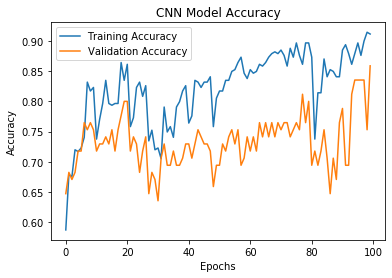

In [67]:
# Evaluate the model on the test set
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(X_test, y_test)
print(f'CNN Test accuracy: {cnn_test_acc}')

# Plot accuracy over epochs
plt.plot(cnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('CNN Model Accuracy')
plt.legend()
plt.show()

3/3 [==============================] - 0s 21ms/step - loss: 0.1183 - accuracy: 0.9765
RNN Test accuracy: 0.9764705896377563


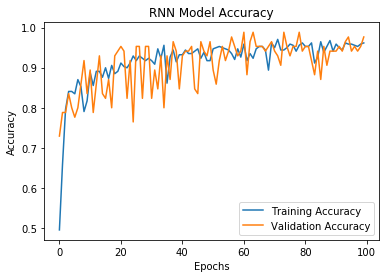

In [68]:
# Evaluate the model on the test set
rnn_test_loss, rnn_test_acc = rnn_model.evaluate(X_test, y_test)
print(f'RNN Test accuracy: {rnn_test_acc}')

# Plot accuracy over epochs
plt.plot(rnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(rnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('RNN Model Accuracy')
plt.legend()
plt.show()

3/3 [==============================] - 0s 44ms/step - loss: nan - accuracy: 0.4235
LSTM Test accuracy: 0.42352941632270813


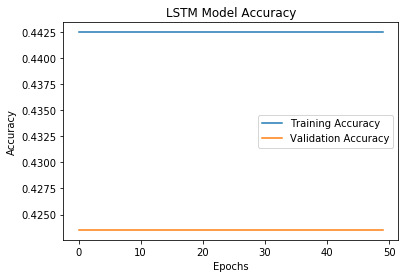

In [52]:
# Evaluate the model on the test set
lstm_test_loss, lstm_test_acc = lstm_model.evaluate(X_test, y_test)
print(f'LSTM Test accuracy: {lstm_test_acc}')

# Plot accuracy over epochs
plt.plot(lstm_history.history['accuracy'], label='Training Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('LSTM Model Accuracy')
plt.legend()
plt.show()

3/3 [==============================] - 0s 3ms/step - loss: 0.8477 - accuracy: 0.7059
FF Test accuracy: 0.7058823704719543


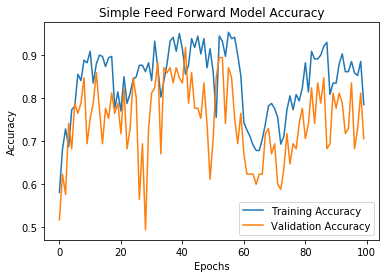

In [69]:
# Evaluate the model on the test set
dumb_test_loss, dumb_test_acc = dumb_model.evaluate(X_test_flatten, y_test)
print(f'FF Test accuracy: {dumb_test_acc}')

# Plot accuracy over epochs
plt.plot(dumb_history.history['accuracy'], label='Training Accuracy')
plt.plot(dumb_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Simple Feed Forward Model Accuracy')
plt.legend()
plt.show()

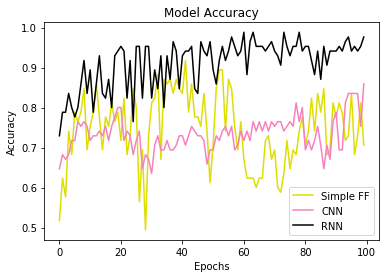

In [94]:
# Plot accuracy over epochs
plt.plot(dumb_history.history['val_accuracy'], label='Simple FF',c='#dede00')
plt.plot(cnn_history.history['val_accuracy'], label='CNN',c='#f781bf')
plt.plot(rnn_history.history['val_accuracy'], label='RNN',c='#000000')


plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()